Exercise 2 (Calibration Table, Notebook, 10P):

In [2]:
#!/usr/bin/python
import matplotlib.pyplot as plt
import numpy as np
import random

# amino acids
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

# Observed percent difference
observed_diff = [1] + list(range(5, 90, 5))

# Evolutionary distance in PAMs
evolutionary_dist = [1, 5, 11, 17, 23, 30, 38, 47, 56, 67, 80, 94, 112, 133, 159, 195, 246, 328]

"""
@Hamming distance : Defined between two strings of equal length, is the number of 
positions with mismatching characters.
@param: seq1: sequence 1, seq2: sequence 2
"""
def Hamming_distance(seq1, seq2):
    dist = 0
    for (a, b) in zip(seq1, seq2):
        if a != b:
            dist += 1
    return dist


"""
@evolutionary distance : dist += diff(seq1[i], seq2[i])
@param seq1: sequence 1, seq2: sequence 2
"""
def evolutionary_distance(seq1, seq2):
    if len(seq1) != len(seq2):
        return -1
    dist = 0
    dist = Hamming_distance(seq1, seq2)
    return dist

"""
@get sequence : generates a random sequence of length n
@param: n: length of sequence
"""
def get_sequence(n):
    return ''.join(random.choices(aa, k=n))           

"""
@mutate sequence : mutates a sequence for the given several times
@param: seq: sequence to mutate, r: number of mutations
"""
def mutate_sequence(seq, r):
    mutated_aa = set(aa)
    mut_pos = random.sample(range(len(seq)), r)
    mutated_seq = list(seq)
    for pos in mut_pos:
        curr_base = mutated_seq[pos]
        mutated_aa.remove(curr_base)
        mutated_seq[pos] = random.choice(list(mutated_aa))
        mutated_aa.add(curr_base)
    return ''.join(mutated_seq)


"""
@simulate_PAM : simulates p PAM unit for the given parameters
@param: p: point accepted mutations or mutation steps, n: length of sequence
"""
def simulate_PAM_unit(p, n):
    seq = get_sequence(n)
    r = round(p * n / 100)
    seq_mut = mutate_sequence(seq, r)
    print(seq)
    print("|" * len(seq))
    print(seq_mut)
    print("evolutionary distance: " + str(evolutionary_distance(seq, seq_mut)))


"""
@repeat_simulation : repeats the PAMsimulation for the given parameters
@param: p: point accepted mutations or mutation steps, n: length of sequence, r: number of simulations, s: number of mutations per run
"""
def repeat_simulation(p, n, r, s):
    average_fraction_table = [[] for i in range(r)]
    for i in range(s):
        prev_seq = get_sequence(n)
        seq_mut = prev_seq
        for j in range(r):
            seq_mut = mutate_sequence(seq_mut, round(p * n / 100))
            average_fraction_table[j].append(evolutionary_distance(prev_seq, seq_mut) / n)
    return average_fraction_table

"""
@plot_simulation : plots the results of the simulation
@param: average_fraction_table: list of lists of fractions, evolutionary_dist: list of evolutionary distances
"""
def plot_simulation(average_fraction_table):
    r = 1 + np.arange(len(average_fraction_table))
    diff = []
    for i in range(len(average_fraction_table)):
        diff.append(sum(average_fraction_table[i]) * 100 / len(average_fraction_table[i]))
    plt.plot(r, diff, label = "uniform distribution")
    plt.title(" average fraction of difference positions")
    plt.xlabel("Number of simulations")
    plt.ylabel("Difference in percent")
    plt.legend()
    plt.show()
    return r, diff


# PAM amino acid frequencies
frequency = np.array([0.087, 0.041, 0.040, 0.047, 0.033, 0.038, 0.050, 0.089, 0.034, 0.037, 0.085, 
0.081, 0.015, 0.040, 0.051, 0.070, 0.058, 0.010, 0.030, 0.065])

# PAM1 matrix
PAM1 = np.array([[9867, 2, 9, 10, 3, 8, 17, 21, 2, 6, 4, 2, 6, 2, 22, 35, 32, 0, 2, 18],
[1, 9913, 1, 0, 1, 10, 0, 0, 10, 3, 1, 19, 4, 1, 4, 6, 1, 8, 0, 1],
[4, 1, 9822, 36, 0, 4, 6, 6, 21, 3, 1, 13, 0, 1, 2, 20, 9, 1, 4, 1],
[6, 0, 42, 9859, 0, 6, 53, 6, 4, 1, 0, 3, 0, 0, 1, 5, 3, 0, 0, 1],
[1, 1, 0, 0, 9973, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 5, 1, 0, 3, 2],
[3, 9, 4, 5, 0, 9876, 27, 1, 23, 1, 3, 6, 4, 0, 6, 2, 2, 0, 0, 1],
[10, 0, 7, 56, 0, 35, 9865, 4, 2, 3, 1, 4, 1, 0, 3, 4, 2, 0, 1, 2],
[21, 1, 12, 11, 1, 3, 7, 9935, 1, 0, 1, 2, 1, 1, 3, 21, 3, 0, 0, 5],
[1, 8, 18, 3, 1, 20, 1, 0, 9912, 0, 1, 1, 0, 2, 3, 1, 1, 1, 4, 1],
[2, 2, 3, 1, 2, 1, 2, 0, 0, 9872, 9, 2, 12, 7, 0, 1, 7, 0, 1, 33],
[3, 1, 3, 0, 0, 6, 1, 1, 4, 22, 9947, 2, 45, 13, 3, 1, 3, 4, 2, 15],
[2, 37, 25, 6, 0, 12, 7, 2, 2, 4, 1, 9926, 20, 0, 3, 8, 11, 0, 1, 1],
[1, 1, 0, 0, 0, 2, 0, 0, 0, 5, 8, 4, 9874, 1, 0, 1, 2, 0, 0, 4],
[1, 1, 1, 0, 0, 0, 0, 1, 2, 8, 6, 0, 4, 9946, 0, 2, 1, 3, 28, 0],
[13, 5, 2, 1, 1, 8, 3, 2, 5, 1, 2, 2, 1, 1, 9926, 12, 4, 0, 0, 2],
[28, 11, 34, 7, 11, 4, 6, 16, 2, 2, 1, 7, 4, 3, 17, 9840, 38, 5, 2, 2],
[22, 2, 13, 4, 1, 3, 2, 2, 1, 11, 2, 8, 6, 1, 5, 32, 9871, 0, 2, 9],
[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 9976, 1, 0],
[1, 0, 3, 0, 3, 0, 1, 0, 4, 1, 1, 0, 0, 21, 0, 1, 1, 2, 9945, 1],
[13, 2, 1, 1, 3, 2, 2, 3, 3, 57, 11, 1, 17, 1, 3, 2, 10, 0, 2, 9901]])


E = [] # Expected percentage of amino acids changes

"""
@calibration_table(): generates a calibration table for PAM
"""
def calibration_table():
    pam1 = PAM1 / 10000
    sum_pi_M = 0 # Sum of pi * M_i,i
    for i in range(20):
        sum_pi_M += frequency[i] * pam1[i][i]
    E.append(100 * (1 - sum_pi_M))
    pam = pam1
    for i in range(1, evolutionary_dist[-1]):
        pam = pam.dot(pam1)
        sum_pi_M = 0 # Sum of pi * M_i,i
        for j in range(20):
            sum_pi_M += frequency[j] * pam[j][j]
        E.append(100 * (1 - sum_pi_M))
    expect_table = [int(np.round(E[i - 1])) for i in evolutionary_dist]
    # diff_table = [np.round([i - 1]) for i in evolutionary_dist]
    print("expected percentage of changes" +"\t" + "PAM evolutionary distance")
    for i in range(len(evolutionary_dist)):
        print(str(expect_table[i]) + "\t" + str(evolutionary_dist[i]))

Compute the calibration table between PAM evolutionary distance and expected percentage of amino acid changes

In [3]:
calibration_table()

expected percentage of changes	PAM evolutionary distance
1	1
5	5
10	11
15	17
20	23
25	30
30	38
35	47
40	56
45	67
50	80
55	94
60	112
65	133
70	159
75	195
80	246
85	328


Interpret the calibrated relation and compare the results with your simulations from Exercise 1. 

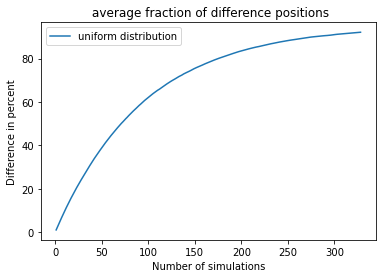

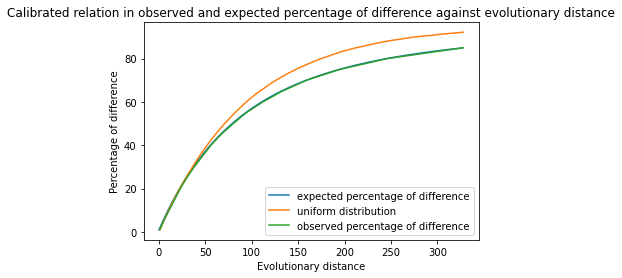

In [4]:
r, diff = plot_simulation(repeat_simulation(1, 300, 328, 200))

def plot_calibration_table():
    plt.plot(range(evolutionary_dist[-1]), E, label = "expected percentage of difference")
    plt.plot(r, diff, label = "uniform distribution")
    plt.plot(evolutionary_dist, observed_diff, label = "observed percentage of difference")
    plt.title("Calibrated relation in observed and expected percentage of difference against evolutionary distance")
    plt.xlabel("Evolutionary distance")
    plt.ylabel("Percentage of difference")
    plt.legend()
    plt.show()
    
plot_calibration_table()

For what kinds of applications is it useful?
Results from exercise 1 is proved not situable for mutations on protein sequences.
For realistic applications should choose PAM matrix for protein as we can see from the plot below, Expected value is basically in line with observed value.